<a href="https://colab.research.google.com/github/bebooneha/neha21399776-assignment1/blob/main/group_assingment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
conn = sqlite3.connect('AUS_energy_sqlite3.db')

In [21]:
cur = conn.cursor()

In [22]:
sql='''
SELECT name FROM sqlite_master WHERE type='table';
'''
cur.execute(sql)
cur.fetchall()

[('AUS_energy',)]

In [23]:
sql='''
PRAGMA table_info('AUS_energy');
'''
cur.execute(sql)
cur.fetchall()

[(0, 'Year', 'TEXT', 0, None, 0),
 (1, 'State', 'TEXT', 0, None, 0),
 (2, 'Coal (PJ)', 'REAL', 0, None, 0),
 (3, 'Oil (PJ)', 'REAL', 0, None, 0),
 (4, 'Gas (PJ)', 'REAL', 0, None, 0),
 (5, 'Renewables (PJ)', 'REAL', 0, None, 0),
 (6, 'Population', 'INTEGER', 0, None, 0),
 (7, 'GSP ($ million)', 'INTEGER', 0, None, 0)]

In [24]:
sql='''
SELECT * FROM AUS_energy;
'''
#Load the data into a dataframe
energy_df = pd.read_sql_query(sql, conn)
energy_df

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
0,2008-09,WA,132.9,294.3,474.7,15.6,2240250,244695
1,2008-09,NSW,800.9,587.5,131.6,54.7,7408540,530532
2,2008-09,VIC,695.3,432.9,273.5,33.6,5371934,368579
3,2008-09,QLD,629.2,469.5,187.9,77.4,4328771,284526
4,2008-09,SA,80.2,120.2,134.0,21.2,1608902,100174
...,...,...,...,...,...,...,...,...
93,2021-22,VIC,410.7,410.0,237.5,105.2,6625964,500900
94,2021-22,QLD,485.6,504.7,305.7,143.0,5320496,384508
95,2021-22,SA,25.9,141.6,80.2,48.3,1821200,124252
96,2021-22,TAS,8.8,39.9,7.1,48.1,571013,36701


In [39]:
#grouped_by_state = energy_df.groupby(['State'])


In [42]:
energy_df[['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']] = energy_df[['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']].apply(pd.to_numeric, errors='coerce')

In [43]:
energy_df['Total_Energy_PJ'] = energy_df['Coal (PJ)'] + energy_df['Oil (PJ)'] + energy_df['Gas (PJ)'] + energy_df['Renewables (PJ)']

In [44]:
print(energy_df)

       Year State  Coal (PJ)  Oil (PJ)  Gas (PJ)  Renewables (PJ)  Population  \
0   2008-09    WA      132.9     294.3     474.7             15.6     2240250   
1   2008-09   NSW      800.9     587.5     131.6             54.7     7408540   
2   2008-09   VIC      695.3     432.9     273.5             33.6     5371934   
3   2008-09   QLD      629.2     469.5     187.9             77.4     4328771   
4   2008-09    SA       80.2     120.2     134.0             21.2     1608902   
..      ...   ...        ...       ...       ...              ...         ...   
93  2021-22   VIC      410.7     410.0     237.5            105.2     6625964   
94  2021-22   QLD      485.6     504.7     305.7            143.0     5320496   
95  2021-22    SA       25.9     141.6      80.2             48.3     1821200   
96  2021-22   TAS        8.8      39.9       7.1             48.1      571013   
97  2021-22    NT        NaN      37.6     110.6              1.6      250219   

    GSP ($ million)  Total_

In [45]:
energy_df['Energy_Intensity'] = energy_df['Total_Energy_PJ'] / energy_df['GSP ($ million)']

In [46]:
print(energy_df)

       Year State  Coal (PJ)  Oil (PJ)  Gas (PJ)  Renewables (PJ)  Population  \
0   2008-09    WA      132.9     294.3     474.7             15.6     2240250   
1   2008-09   NSW      800.9     587.5     131.6             54.7     7408540   
2   2008-09   VIC      695.3     432.9     273.5             33.6     5371934   
3   2008-09   QLD      629.2     469.5     187.9             77.4     4328771   
4   2008-09    SA       80.2     120.2     134.0             21.2     1608902   
..      ...   ...        ...       ...       ...              ...         ...   
93  2021-22   VIC      410.7     410.0     237.5            105.2     6625964   
94  2021-22   QLD      485.6     504.7     305.7            143.0     5320496   
95  2021-22    SA       25.9     141.6      80.2             48.3     1821200   
96  2021-22   TAS        8.8      39.9       7.1             48.1      571013   
97  2021-22    NT        NaN      37.6     110.6              1.6      250219   

    GSP ($ million)  Total_

In [47]:
grouped_by_state_year = energy_df.groupby(['State', 'Year']).mean()

In [48]:
print(grouped_by_state_year)

               Coal (PJ)  Oil (PJ)  Gas (PJ)  Renewables (PJ)  Population  \
State Year                                                                  
NSW   2008-09      800.9     587.5     131.6             54.7   7408540.0   
      2009-10      771.8     638.9     148.7             63.8   7506058.0   
      2010-11      732.2     685.0     146.5             68.6   7586514.0   
      2011-12      692.7     687.4     142.1             71.1   7680783.0   
      2012-13      643.0     677.4     157.4             70.9   7787289.0   
...                  ...       ...       ...              ...         ...   
WA    2017-18      136.2     405.2     643.3             25.0   2617792.0   
      2018-19      126.8     439.4     667.8             27.3   2659625.0   
      2019-20      119.5     423.6     692.6             29.1   2712912.0   
      2020-21      114.3     418.6     670.2             35.9   2749365.0   
      2021-22      121.1     422.5     673.1             41.2   2789148.0   

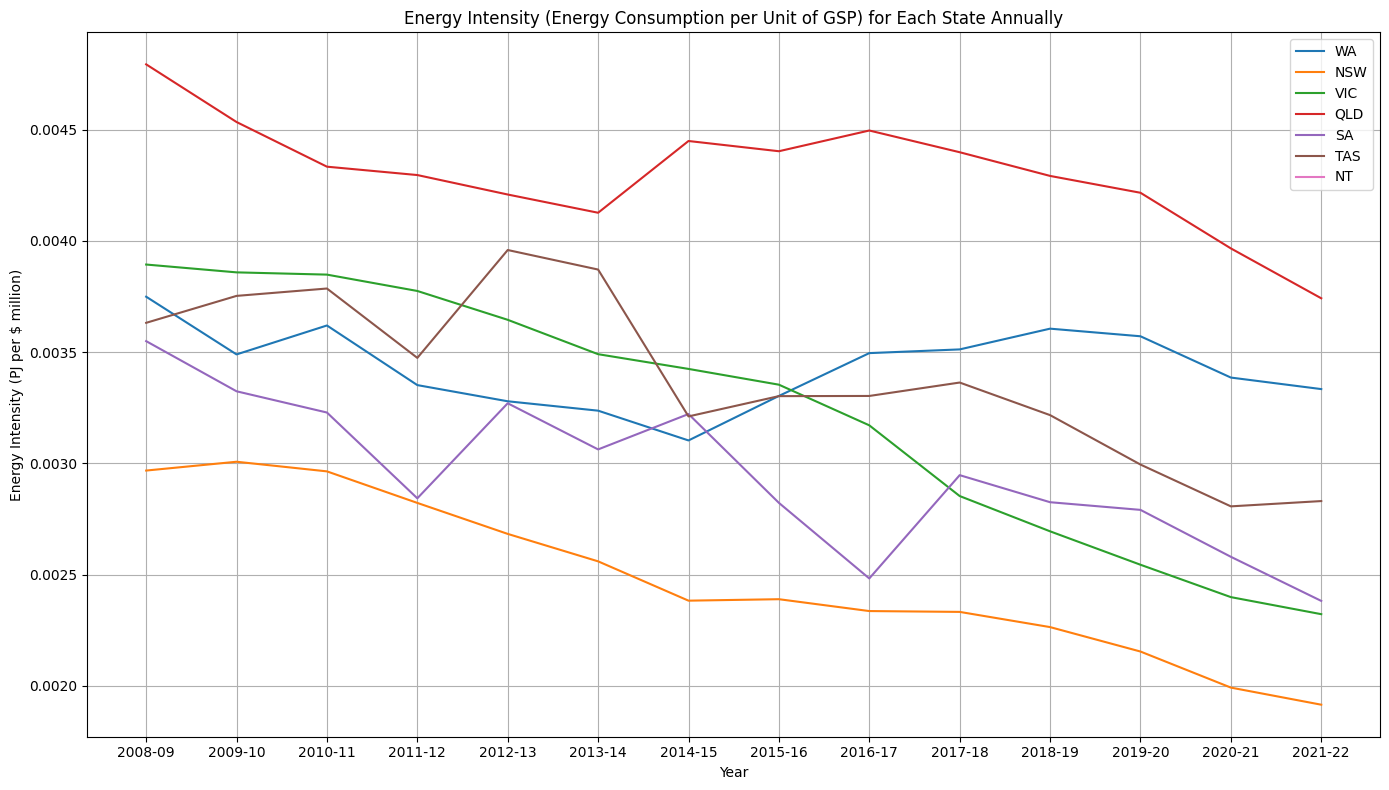

In [50]:
plt.figure(figsize=(14, 8))
for state in energy_df['State'].unique():
    state_data = grouped_by_state_year.loc[state]
    plt.plot(state_data.index, state_data['Energy_Intensity'], label=state)

plt.title('Energy Intensity (Energy Consumption per Unit of GSP) for Each State Annually')
plt.xlabel('Year')
plt.ylabel('Energy Intensity (PJ per $ million)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()